In [12]:
import numpy as np
import pandas as pd

In [13]:
data_pm = pd.read_csv("./best_20com_9pm.csv", header=0, index_col=[0])
index = data_pm.index.tolist()
print(index)
def read_csv(path):
    return pd.read_csv(path,index_col=[0,1],header=0)
path_budget_list=["./budget"+str(i)+".csv" for i in index]
df = [read_csv(name) for name in path_budget_list]
df = pd.concat(df,axis=1)
df.columns = index
print(df.columns)
print(df)
df.to_csv("./Lamarck_budget.csv",header=True,index=True)

[590, 593, 579, 588, 589, 591, 576, 587, 569, 558, 592, 572, 594, 542, 570, 562, 575, 573, 552, 555]
Int64Index([590, 593, 579, 588, 589, 591, 576, 587, 569, 558, 592, 572, 594,
            542, 570, 562, 575, 573, 552, 555],
           dtype='int64')
                 590      593      579      588      589      591      576  \
F1  Times1   10198.0  10198.0  10398.0  10198.0  10198.0  10198.0  10398.0   
    Times2   10198.0  10198.0  10398.0  10198.0  10198.0  10198.0  10398.0   
    Times3   10198.0  10198.0  10398.0  10198.0  10198.0  10198.0  10398.0   
    Times4   10198.0  10198.0  10398.0  10198.0  10198.0  10198.0  10398.0   
    Times5   10198.0  10198.0  10398.0  10198.0  10198.0  10198.0  10398.0   
...              ...      ...      ...      ...      ...      ...      ...   
F23 Times16  10198.0  10198.0  10398.0  10198.0  10198.0  10198.0  10398.0   
    Times17  10198.0  10198.0  10398.0  10198.0  10198.0  10198.0  10398.0   
    Times18  10198.0  10198.0  10398.0  10198.

In [14]:
data_pm = pd.read_csv("./best_20com_9pm.csv", header=0, index_col=[0])
index = data_pm.index.tolist()
print(index)
def read_csv(path):
    return pd.read_csv(path,index_col=[0,1],header=0)
path_percent_list=["./combination"+str(i)+".csv" for i in index]
df = [read_csv(name) for name in path_percent_list]
df = pd.concat(df,axis=1)
df.columns = index
print(df.columns)
print(df)
df.to_csv("./Lamarck_rawdata.csv",header=True,index=True)

def percent(Function, optimal):
    dataframe = df.loc[(Function, slice(None)), :]
    dataframe = pd.DataFrame(data=dataframe.values,
                             columns=dataframe.columns)
    percent_dataframe = dataframe.applymap(lambda x: True if ((x-optimal)<=threshold or x<=optimal) else False)
    percent_dataframe["Function"] = Function
    return percent_dataframe

threshold =0.0001
opt = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -418.98 * 50, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0003, -1.0316, 0.398, 3.0,
       -3.86, -3.32, -10.1532,-10.4028, -10.5363]
function_list = [1,2,3,5,6,7,11,12,13,14,15,16,17,18,19,20,21,22,23]
percent_df = [percent(Function="F" + str(i), optimal=opt[i - 1]) for i in function_list]
percent_df = pd.concat(percent_df, axis=0)
percent_df = percent_df.groupby(["Function"]).sum().applymap(lambda x: str(x * 10) + "%")
index = ["F" + str(i) for i in function_list]
percent_df = percent_df.loc[index]
display(percent_df)
percent_df.to_csv("./Lamarck_percent.csv")

[590, 593, 579, 588, 589, 591, 576, 587, 569, 558, 592, 572, 594, 542, 570, 562, 575, 573, 552, 555]
Int64Index([590, 593, 579, 588, 589, 591, 576, 587, 569, 558, 592, 572, 594,
            542, 570, 562, 575, 573, 552, 555],
           dtype='int64')
                    590         593         579         588         589  \
F1  Times1   314.972789  235.033032  247.318672  283.640221  128.882077   
    Times2   307.357389  254.207956  262.825454  185.712598  148.658884   
    Times3   329.350191  391.179104  242.471132  157.065850  106.880806   
    Times4   262.068038  357.569986  390.753049  187.960803  117.821753   
    Times5   241.013061  358.077240  207.505266  197.170213  223.457353   
...                 ...         ...         ...         ...         ...   
F23 Times16  -10.144680  -10.467920  -10.352933   -3.835119   -2.870288   
    Times17   -3.834802  -10.501093   -3.834981  -10.529302   -2.421416   
    Times18   -3.833727   -2.870647  -10.034656   -2.426939   -3.835027  

,590,593,579,588,589,591,576,587,569,558,592,572,594,542,570,562,575,573,552,555
Function,,,,,,,,,,,,,,,,,,,,
F1,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
F2,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
F3,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
F5,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
F6,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
F7,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
F11,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
F12,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
F13,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%


/var/folders/vb/bhfltf7s0n5dmrcb5r9s80mw0000gn/T/ipykernel_1270/939628730.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax=sns.barplot(data=dataframe,y="Percent",x="Function",ci=95)


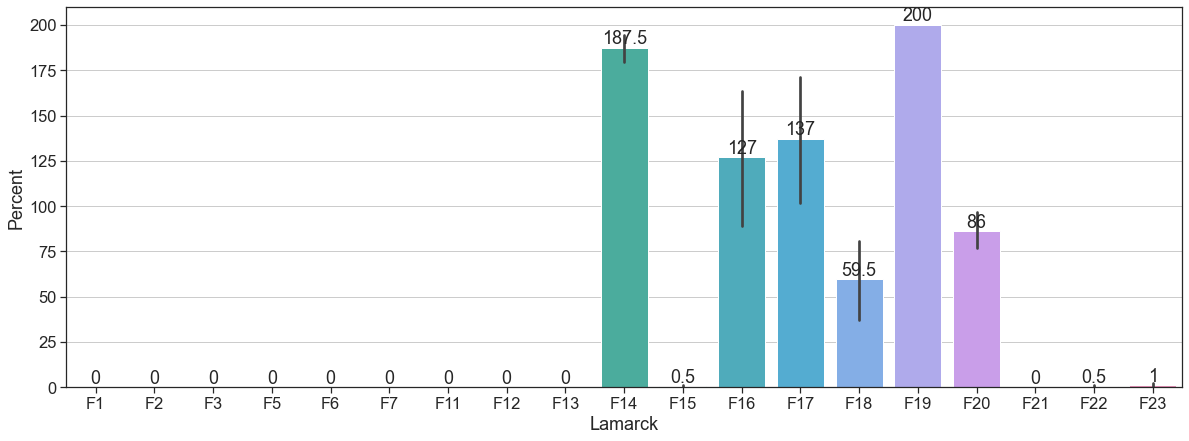

In [15]:
from matplotlib import pyplot as plt
dataframe = percent_df.copy()
dataframe = dataframe.applymap(lambda x:x if not '%' in str(x) else x.replace('%',''))
# display(dataframe)
import seaborn as sns
dataframe = dataframe.stack()
# display(dataframe)
dataframe = dataframe.rename_axis(index=["Function","Combinations"])
dataframe = dataframe.reset_index(level=[0, 1], name="Percent")
dataframe["Percent"] = pd.to_numeric(dataframe["Percent"])
dataframe = dataframe.reset_index(drop=False)
# display(dataframe)
function_list = ["F" + str(i) for i in range(1, 24, 1)]
def show_graph(dataframe):
    sns.set_theme(style="whitegrid", palette="pastel",font_scale=1.5)
    sns.set_style("ticks",{'axes.grid' : True})
    plt.figure(figsize=(20,7))
    plt.subplot(1,1,1)
    ax=sns.barplot(data=dataframe,y="Percent",x="Function",ci=95)
    ax.bar_label(ax.containers[0],label_type='edge')
    plt.xlabel("Lamarck")
    # sns.move_legend(ax, "upper left", bbox_to_anchor=(0, 1))
    plt.savefig("./Lamarck_percent.png", dpi=1200, bbox_inches='tight')
    plt.show()
show_graph(dataframe=dataframe)

In [16]:
# from matplotlib import pyplot as plt
# dataframe = df.copy()
# dataframe = dataframe.stack()
# # display(dataframe)
# dataframe = dataframe.rename_axis(index=["Function","Times","Combinations"])
# dataframe = dataframe.reset_index(level=[0, 1], name="Solutions")
# dataframe["Solutions"] = pd.to_numeric(dataframe["Solutions"])
# dataframe = dataframe.reset_index(drop=False)
# # display(dataframe)
# opt = [0, 0, 0, 0, 0, 0, 0, -20949, 0, 0, 0, 0, 0, 1, 0.0003, -1.0316, 0.398, 3, -3.86, -3.32,-10.1532, -10.4028, -10.5363]
# def show_graph(dataframe):
#     sns.set_theme(style="whitegrid", palette="pastel",font_scale=1.5)
#     dist_cols = 3
#     dist_rows = 8
#     plt.figure(figsize=(7 * dist_cols, 4 * dist_rows))
#     i = 1
#     for function in function_list:
#         dataf = dataframe[dataframe["Function"] == function]
#         plt.subplot(dist_rows, dist_cols, i)
#         ax=sns.boxplot(data=dataf, y="Solutions",palette="viridis",x="Function",hue="Function",width=0.2)
#         sns.move_legend(ax, "upper left", bbox_to_anchor=(0, 1),frameon=False)
#         plt.axhline(y=opt[i-1],color="red")
#         plt.xlabel("")
#         plt.ylabel("Solutions")
#         i = i + 1
#     plt.savefig("./boxplot_Lamarck.png", dpi=1200, bbox_inches='tight')
#     plt.show()
# show_graph(dataframe=dataframe)